# MNIST Densely Connected Networks
This is a Python script written in Google Colab to build, train, and evaluate a simple neural network model for image classification using the MNIST dataset. The MNIST dataset consists of images of handwritten digits (0-9) that are commonly used for training various image processing systems. Let's break down the code and explain what each part does:



In [ ]:
# Import libraries and add some helper functions to the runtime.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions
def show_min_max(array, i):
    random_image = array[i]
    print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(" Digit " + str(labels[i]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

The code starts by importing necessary libraries: TensorFlow, Keras, NumPy, and Matplotlib. Additionally, two helper functions are defined - show_min_max and plot_image - which will be used later to visualize data.



In [ ]:
# Rows and columns for each image
img_rows = 28
img_cols = 28
# Number of output classes
num_classes = 10

# Load data into the program
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()


Here, the code sets the dimensions for each image (img_rows and img_cols) to 28x28 pixels, and the number of output classes (num_classes) to 10 since this is a handwritten digit classification problem (0 to 9). The MNIST dataset is loaded, split into training and test sets, and stored in corresponding variables.



In [ ]:
# Shape of data
print(train_images.shape)
print(test_images.shape)

# Value of input shape to shape of grid
input_shape = (28, 28, 1)

# Reshape the data from a long list of pixels to a 28x28 grid.
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
# Add print statements to see the new shape.

print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


The shapes of the training and test data are printed to understand their dimensions. The input_shape variable is set to (28, 28, 1) to represent the dimensions of each image, including the single channel (grayscale).

Next, the training and test images are reshaped to be 4-dimensional arrays, where the first dimension represents the number of images, the second and third dimensions represent the width and height of each image, and the last dimension represents the number of channels (1 for grayscale).

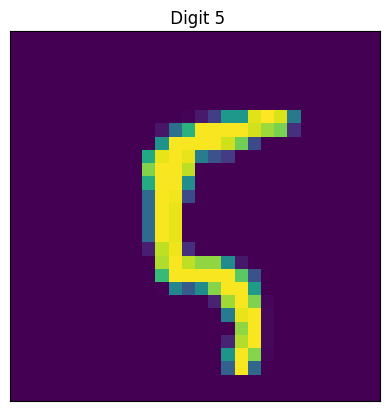

In [ ]:
# Example of image
plot_image(train_images, 100, train_labels)


This code uses the plot_image helper function to display the 100th training image along with its corresponding label.



In [ ]:
# How the computer would see the data
out = ""
for i in range(28):
    for j in range(28):
        f = int(train_images[100][i][j][0])
        s = "{:3d}".format(f)
        out += (str(s)+" ")
    print(out)
    out = ""


  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136 244 255 241 103   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253 238 218 204  35   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 253 237 200  57   0   0   0   0   0 

This section prints out the pixel values of the 100th training image in a grid format, showing how the computer views the handwritten digit.



In [ ]:
# Display maximum and minimum values
show_min_max(train_images, 100)


0 255


The show_min_max helper function is used to display the minimum and maximum pixel values of the 100th training image.



In [ ]:
# Convert to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize the pixel values to the range [0, 1]
train_images /= 255
test_images /= 255

# Convert the labels to one-hot encoded format
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


The pixel values of the training and test images are converted to float32 and then normalized to the range [0, 1] by dividing by 255 (maximum pixel value). Additionally, the labels are converted from integer format to one-hot encoded format, which is required for categorical classification.



In [ ]:
# Import tenserflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Training is done in a sequence of rounds called epochs. Each epoch is one pass over the dataset. Meaning, in each epoch, every image in the dataset is passed through your model once. Generally, the more epochs you run, the better your results, but the longer it will take to train. Finding the sweet spot between good results and reasonable runtime is a big challenge in training a model.
epochs = 10

# You'll be making a sequential model. Sequential models are split into layers. A layer is one set of neurons that processes the inputs from the previous layer, then passes it along to the next layer. The first layer reads in the original data, and the final layer produces the network's prediction.
model = Sequential()

# Add the input shape to the layer being added in the cell below.
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(rate=0.3))

# Add another Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 flatten_8 (Flatten)         (None, 2592)              0         
                                                      

Here, the code sets the number of training epochs to 10. It defines a sequential model with two dense layers. The first layer is a flatten layer that takes the input shape of (28, 28, 1). The second layer is a dense layer with 16 units and a ReLU activation function. The third layer is another dense layer with 10 units (equal to the number of output classes) and a softmax activation function, which is suitable for multiclass classification. The model.summary() displays a summary of the model architecture.



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=64, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
scores = model.evaluate(test_images, test_labels, verbose=0)



Epoch 1/10
938/938 [==============================] - 8s 5ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0303 - val_accuracy: 0.9928
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0343 - val_accuracy: 0.9922
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0375 - val_accuracy: 0.9923
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0357 - val_accuracy: 0.9930
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0375 - val_accuracy: 0.9929
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0382 - val_accuracy: 0.9925
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0358 - val_accuracy: 0.9930
Epoch 

The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric. It is then trained on the training data using the model.fit() function, with the specified number of epochs. Finally, the model's performance is evaluated on the test data using the model.evaluate() function, and the test loss and accuracy are printed.

In [ ]:
model.save('my_model.h5')


The trained model is saved to a file named 'my_model.h5' using the model.save() function.



The trained CNN model is saved to a file named "cnn_model.h5" using the save() method of the model. This saved model can be loaded and used for predictions on new images later. You can create your own test images, or you can use these example images: https://drive.google.com/drive/folders/1P1p161W5SSt2wFh7W3Z7-6gFVsv7kVsW.


Saving test3.png to test3 (4).png


1/1 [==============================] - 0s 100ms/step


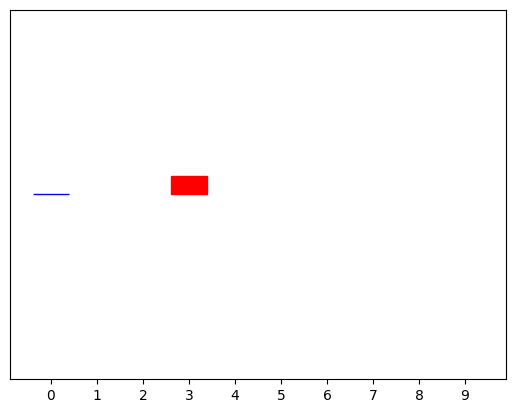

The predicted number is the number  3


In [ ]:
# Visual graph representation of the model's output
def plot_value_array(predictions_array, true_label, h):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([(-1*h), h])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()
  print("The predicted number is the number ", predicted_label)

# Ability to upload images
from google.colab import files
uploaded = files.upload()
model = keras.models.load_model('my_model.h5')
for filename in uploaded.keys():
    path = filename

# Modify the image loading code to use the uploaded image
img = tf.keras.preprocessing.image.load_img(path, target_size=(28, 28), color_mode="grayscale")
img_arr = tf.keras.preprocessing.image.img_to_array(img)

# Perform the prediction using the loaded image
arr = model.predict(np.expand_dims(img_arr, axis=0))

# Call of graph function
plot_value_array(arr, 0, num_classes)

